## Constructing Decision Tree Manually using the Gini Index 

### Step1: Create dataset by hand

In [1]:
weather_csv = """Outlook,Humidity,Windy,Play (outcome)
sunny,normal,F,Y
rainy,normal,F,Y
rainy,high,F,Y
rainy,normal,F,Y
sunny,normal,F,Y
sunny,high,F,N
sunny,high,F,N
rainy,normal,T,N
rainy,high,T,N
sunny,high,T,N
sunny,normal,T,Y"""

### Step2: Load dataset into pandas

In [2]:
import pandas as pd

weather_df = pd.DataFrame([x.split(',') for x in weather_csv.split('\n')[1:]], columns=[x for x in weather_csv.split('\n')[0].split(',')])
weather_df

Outlook Humidity Windy Play (outcome)
0    sunny   normal     F              Y
1    rainy   normal     F              Y
2    rainy     high     F              Y
3    rainy   normal     F              Y
4    sunny   normal     F              Y
5    sunny     high     F              N
6    sunny     high     F              N
7    rainy   normal     T              N
8    rainy     high     T              N
9    sunny     high     T              N
10   sunny   normal     T              Y

### Step 3: Find the Best Split (GINI)

Gini index:

$$GINI(t) = 1 - \sum [p(j | t)]^2$$

A node is "pure" if gini = 0.
A node is "not pure" if gini = 0.5.

The quality of spilt is computed as:

$$GINI_{split}=\sum^k_{i=1}\frac{n_i}{n}GINI(i)$$

Define conditional Gini Function

In [3]:
def gini(i, j):
  p = 0
  if i != 0 or j != 0:
    p = i / (i + j)
  return 1 - p * p - (1 - p) * (1 - p)

def gini_feature(p, q, gini1, gini2):
  return p * gini1 + q * gini2

#### Root Gini calculate

**1. Calculate Gini of 'Play (outcome)' given 'Outlook'**

In [4]:
# put sunny only data in a new dataframe
weather_df_sunny = weather_df.where(weather_df['Outlook']=='sunny').dropna()
weather_df_sunny

Outlook Humidity Windy Play (outcome)
0    sunny   normal     F              Y
4    sunny   normal     F              Y
5    sunny     high     F              N
6    sunny     high     F              N
9    sunny     high     T              N
10   sunny   normal     T              Y

In [5]:
gini(3,3)

0.5

In [6]:
# put rainy only data in a new dataframe
weather_df_rainy = weather_df.where(weather_df['Outlook']=='rainy').dropna()
weather_df_rainy

Outlook Humidity Windy Play (outcome)
1   rainy   normal     F              Y
2   rainy     high     F              Y
3   rainy   normal     F              Y
7   rainy   normal     T              N
8   rainy     high     T              N

In [7]:
gini(3,2)

0.48

Calculate Gini for 'Outlook'

In [8]:
gini_outlook = gini_feature(6/11, 5/11, gini(3,3), gini(3,2))
gini_outlook

0.49090909090909085

**2. Calculate Gini of 'Play (outcome)' given 'Humidity'**

In [9]:
# put normal only data in a new dataframe
weather_df_normal = weather_df.where(weather_df['Humidity']=='normal').dropna()
weather_df_normal

Outlook Humidity Windy Play (outcome)
0    sunny   normal     F              Y
1    rainy   normal     F              Y
3    rainy   normal     F              Y
4    sunny   normal     F              Y
7    rainy   normal     T              N
10   sunny   normal     T              Y

In [10]:
gini(5,1)

0.2777777777777777

In [11]:
# put normal only data in a new dataframe
weather_df_high = weather_df.where(weather_df['Humidity']=='high').dropna()
weather_df_high

Outlook Humidity Windy Play (outcome)
2   rainy     high     F              Y
5   sunny     high     F              N
6   sunny     high     F              N
8   rainy     high     T              N
9   sunny     high     T              N

In [12]:
gini(1,4)

0.31999999999999984

Calculate Gini for 'Humidity'

In [13]:
gini_humidity = gini_feature(6/11, 5/11, gini(5,1), gini(1,4))
gini_humidity

0.29696969696969683

**3. Calculate Gini of 'Play (outcome)' given 'Windy'**

In [14]:
# put windy only data in a new dataframe
weather_df_T = weather_df.where(weather_df['Windy']=='T').dropna()
weather_df_T

Outlook Humidity Windy Play (outcome)
7    rainy   normal     T              N
8    rainy     high     T              N
9    sunny     high     T              N
10   sunny   normal     T              Y

In [15]:
gini(1,3)

0.375

In [16]:
# put not windy only data in a new dataframe
weather_df_F = weather_df.where(weather_df['Windy']=='F').dropna()
weather_df_F

Outlook Humidity Windy Play (outcome)
0   sunny   normal     F              Y
1   rainy   normal     F              Y
2   rainy     high     F              Y
3   rainy   normal     F              Y
4   sunny   normal     F              Y
5   sunny     high     F              N
6   sunny     high     F              N

In [17]:
gini(5,2)

0.40816326530612246

Calculate Gini for 'Windy'

In [18]:
gini_feature(4/11, 7/11, gini(1,3), gini(5,2))

0.39610389610389607

#### **Humidity Selected**

When normal humidity

OutLook feature

In [19]:
weather_df_normal_sunny = weather_df_normal.where(weather_df['Outlook']=='sunny').dropna()
weather_df_normal_sunny

Outlook Humidity Windy Play (outcome)
0    sunny   normal     F              Y
4    sunny   normal     F              Y
10   sunny   normal     T              Y

In [20]:
gini(3,0)

0.0

In [21]:
weather_df_normal_rainy = weather_df_normal.where(weather_df['Outlook']=='rainy').dropna()
weather_df_normal_rainy

Outlook Humidity Windy Play (outcome)
1   rainy   normal     F              Y
3   rainy   normal     F              Y
7   rainy   normal     T              N

In [22]:
gini(2,1)

0.4444444444444444

In [23]:
gini_feature(3/6, 3/6, gini(3,0), gini(2,1))

0.2222222222222222

Windy feature

In [24]:
weather_df_normal_T = weather_df_normal.where(weather_df['Windy']=='T').dropna()
weather_df_normal_T

Outlook Humidity Windy Play (outcome)
7    rainy   normal     T              N
10   sunny   normal     T              Y

In [25]:
gini(1,1)

0.5

In [26]:
weather_df_normal_F = weather_df_normal.where(weather_df['Windy']=='F').dropna()
weather_df_normal_F

Outlook Humidity Windy Play (outcome)
0   sunny   normal     F              Y
1   rainy   normal     F              Y
3   rainy   normal     F              Y
4   sunny   normal     F              Y

In [27]:
gini(4,0)

0.0

In [28]:
gini_feature(2/6, 4/6, gini(1, 1), gini(4,0))

0.16666666666666666

In [29]:
weather_df_normal_sunny = weather_df_normal.where(weather_df['Outlook']=='sunny').dropna()
weather_df_normal_sunny

Outlook Humidity Windy Play (outcome)
0    sunny   normal     F              Y
4    sunny   normal     F              Y
10   sunny   normal     T              Y

In [30]:
weather_df_normal_rainy = weather_df_normal.where(weather_df['Outlook']=='rainy').dropna()
weather_df_normal_rainy

Outlook Humidity Windy Play (outcome)
1   rainy   normal     F              Y
3   rainy   normal     F              Y
7   rainy   normal     T              N

In [31]:
gini_feature(5/6, 1/6, gini(3,0), gini(2,1))

0.07407407407407407

When High Humidity

OutLook feature

In [32]:
weather_df_high_sunny = weather_df_high.where(weather_df['Outlook']=='sunny').dropna()
weather_df_high_sunny

Outlook Humidity Windy Play (outcome)
5   sunny     high     F              N
6   sunny     high     F              N
9   sunny     high     T              N

In [33]:
gini(0,3)

0.0

In [34]:
weather_df_high_rainy = weather_df_high.where(weather_df['Outlook']=='rainy').dropna()
weather_df_high_rainy

Outlook Humidity Windy Play (outcome)
2   rainy     high     F              Y
8   rainy     high     T              N

In [35]:
gini(1,1)

0.5

In [36]:
gini_feature(3/5, 2/5, gini(0,3), gini(1,1))

0.2

Windy feature

In [37]:
weather_df_high_T = weather_df_high.where(weather_df['Windy']=='T').dropna()
weather_df_high_T

Outlook Humidity Windy Play (outcome)
8   rainy     high     T              N
9   sunny     high     T              N

In [38]:
gini(0,2)

0.0

In [39]:
weather_df_high_F = weather_df_high.where(weather_df['Windy']=='F').dropna()
weather_df_high_F

Outlook Humidity Windy Play (outcome)
2   rainy     high     F              Y
5   sunny     high     F              N
6   sunny     high     F              N

In [40]:
gini(1,2)

0.4444444444444443

In [41]:
gini_feature(2/5, 3/5, gini(0,2), gini(1,2))

0.26666666666666655

#### **Humidity=high and OutLook=rainy Selected**

In [42]:
weather_df_high_rainy_T = weather_df_high_rainy.where(weather_df['Windy']=='T').dropna()
weather_df_high_rainy_T

Outlook Humidity Windy Play (outcome)
8   rainy     high     T              N

In [43]:
gini(0,1)

0.0

In [44]:
weather_df_high_rainy_F = weather_df_high_rainy.where(weather_df['Windy']=='F').dropna()
weather_df_high_rainy_F

Outlook Humidity Windy Play (outcome)
2   rainy     high     F              Y

In [45]:
gini(0,1)

0.0

#### **Humidity=normal and Windy=True Selected**

In [46]:
weather_df_normal_T_sunny = weather_df_normal_T.where(weather_df['Outlook']=='sunny').dropna()
weather_df_normal_T_sunny

Outlook Humidity Windy Play (outcome)
10   sunny   normal     T              Y

In [47]:
gini(1,0)

0.0

In [48]:
weather_df_normal_T_rainy = weather_df_normal_T.where(weather_df['Outlook']=='rainy').dropna()
weather_df_normal_T_rainy

Outlook Humidity Windy Play (outcome)
7   rainy   normal     T              N

In [49]:
gini(0,1)

0.0

### Construct tree manually

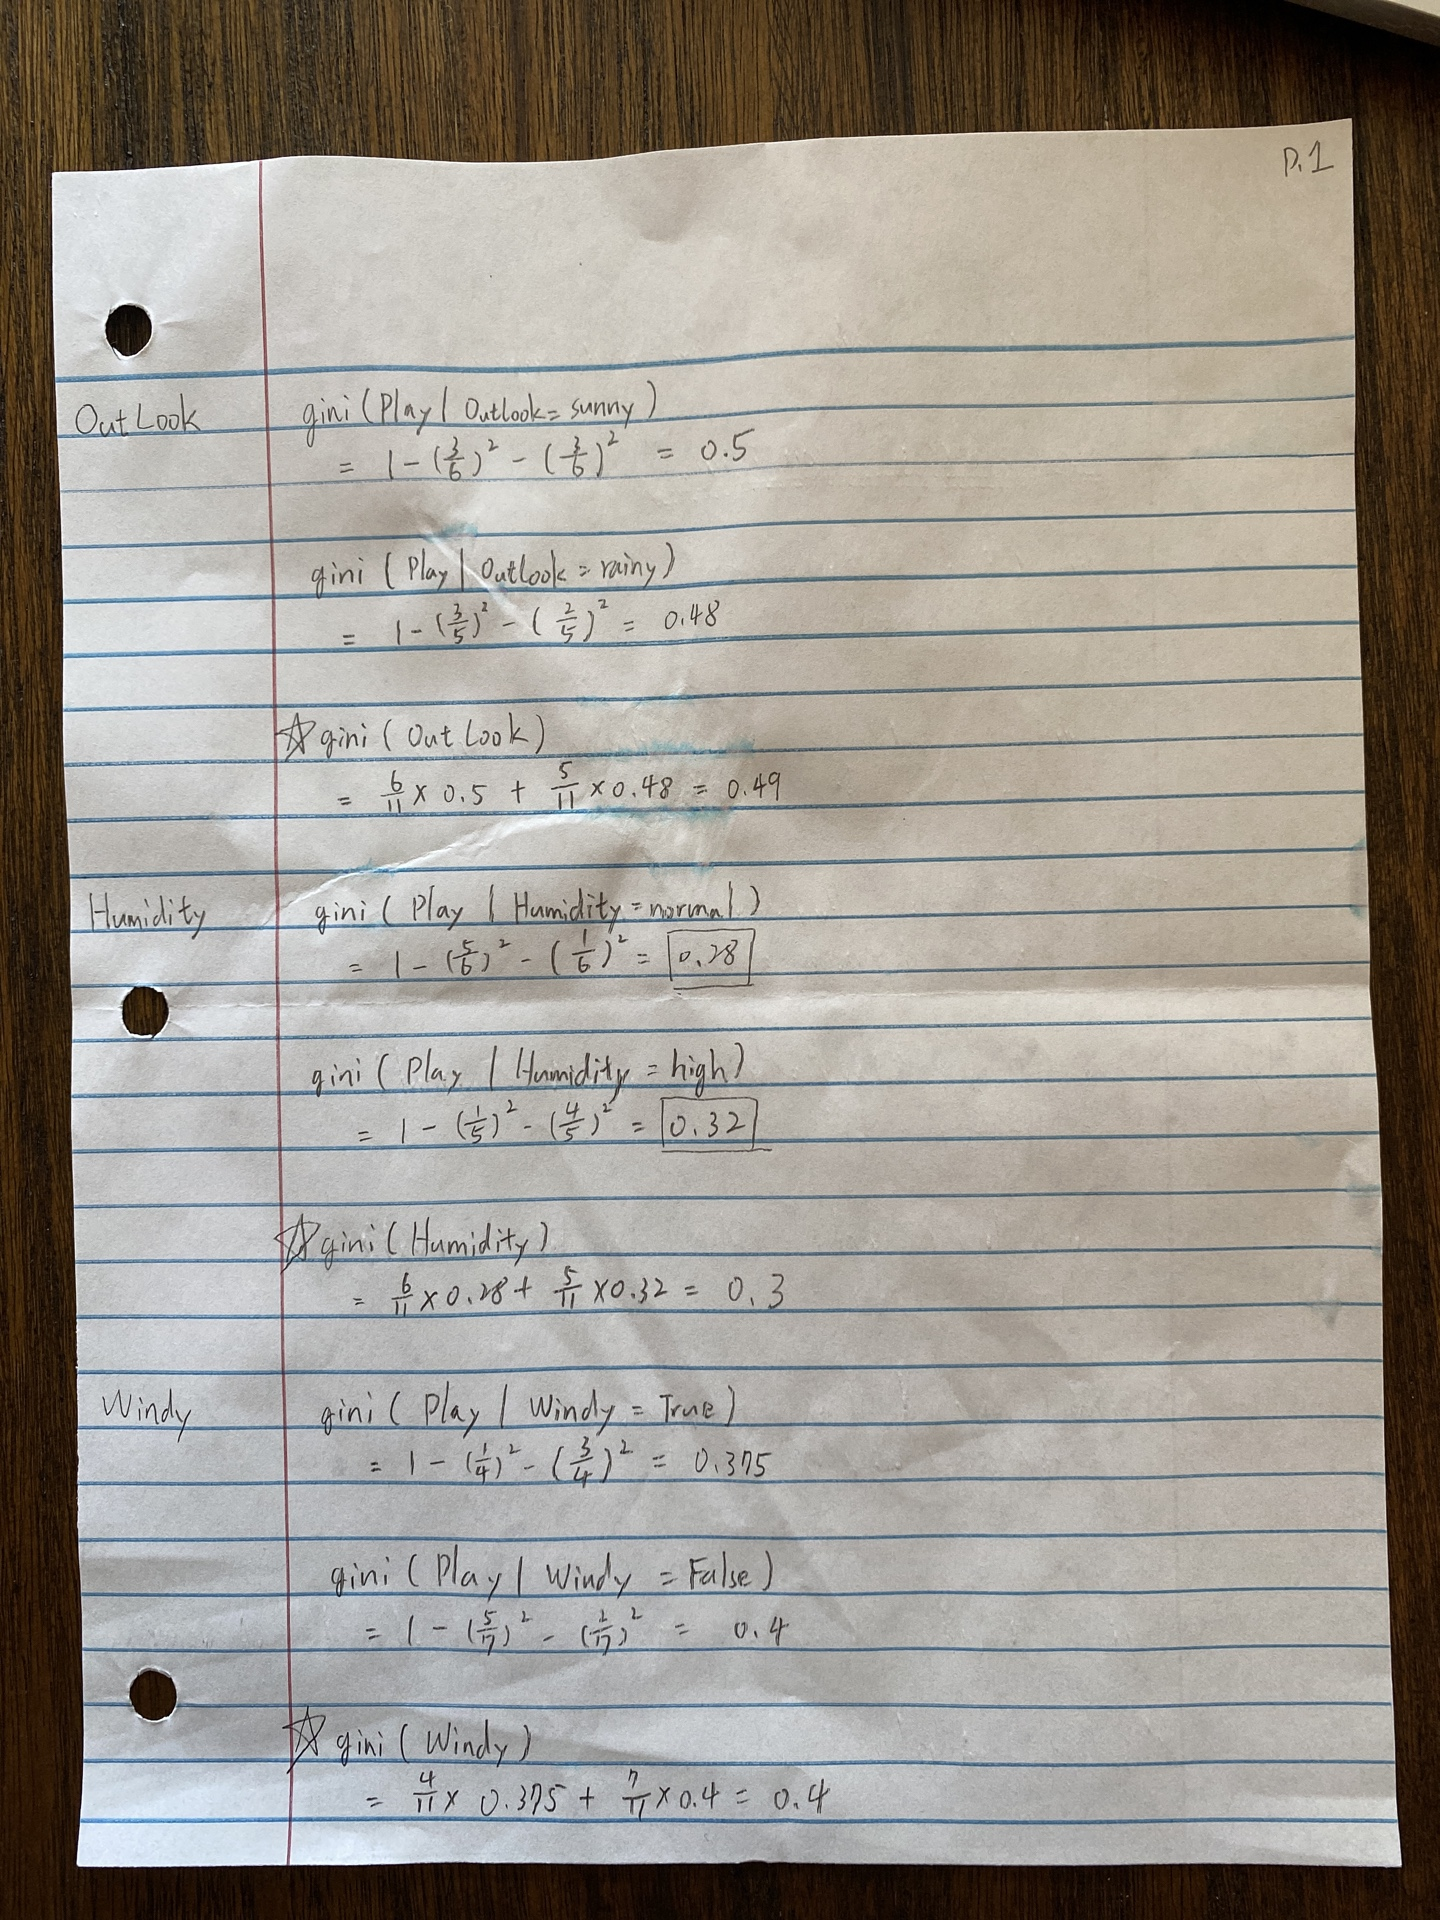

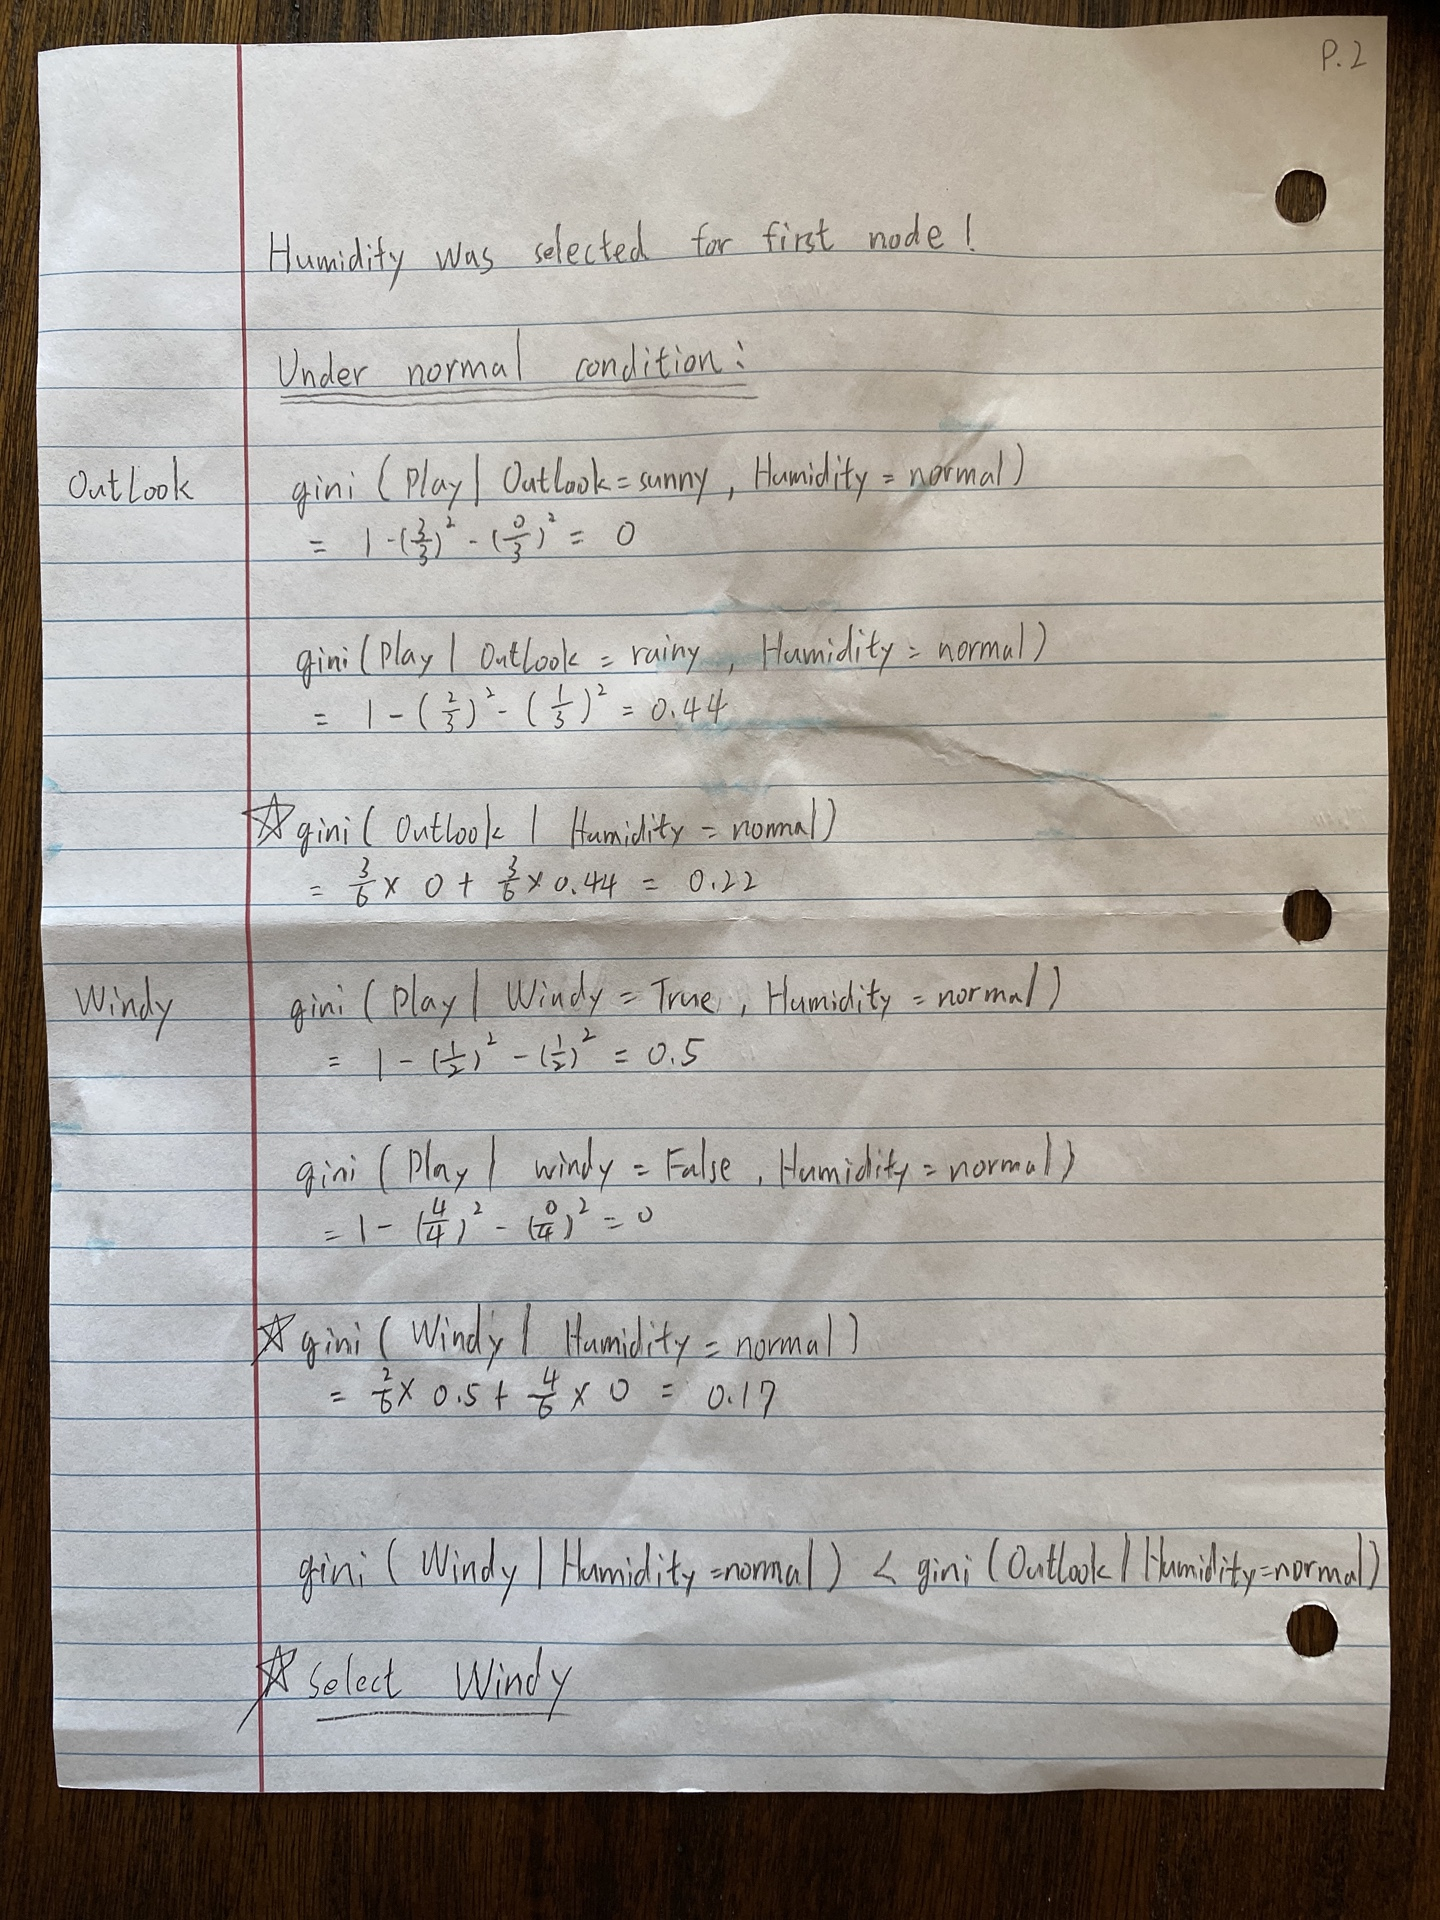

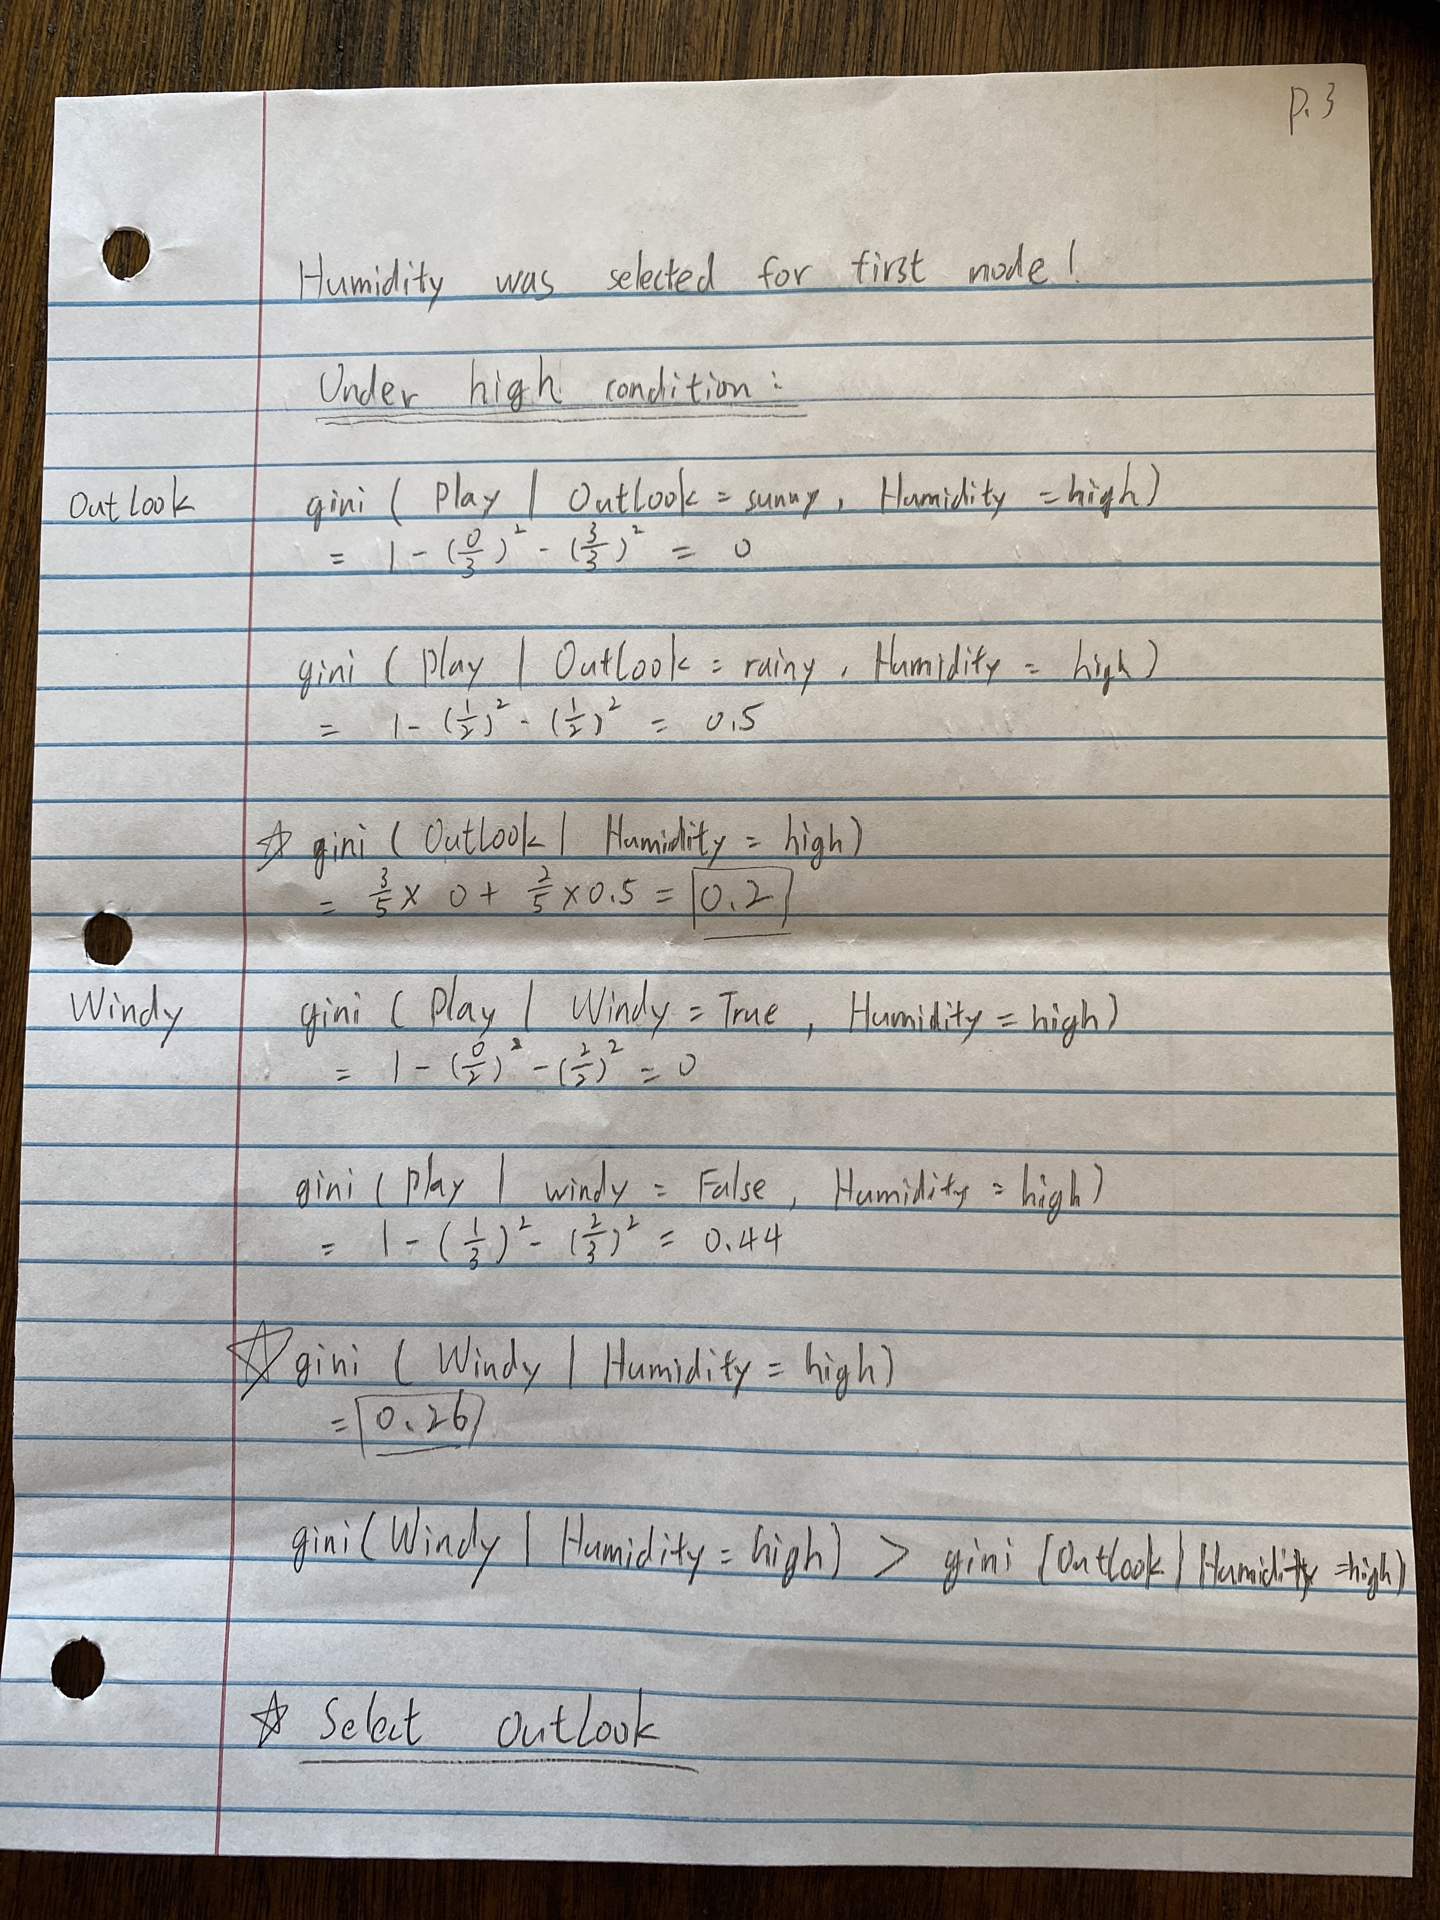

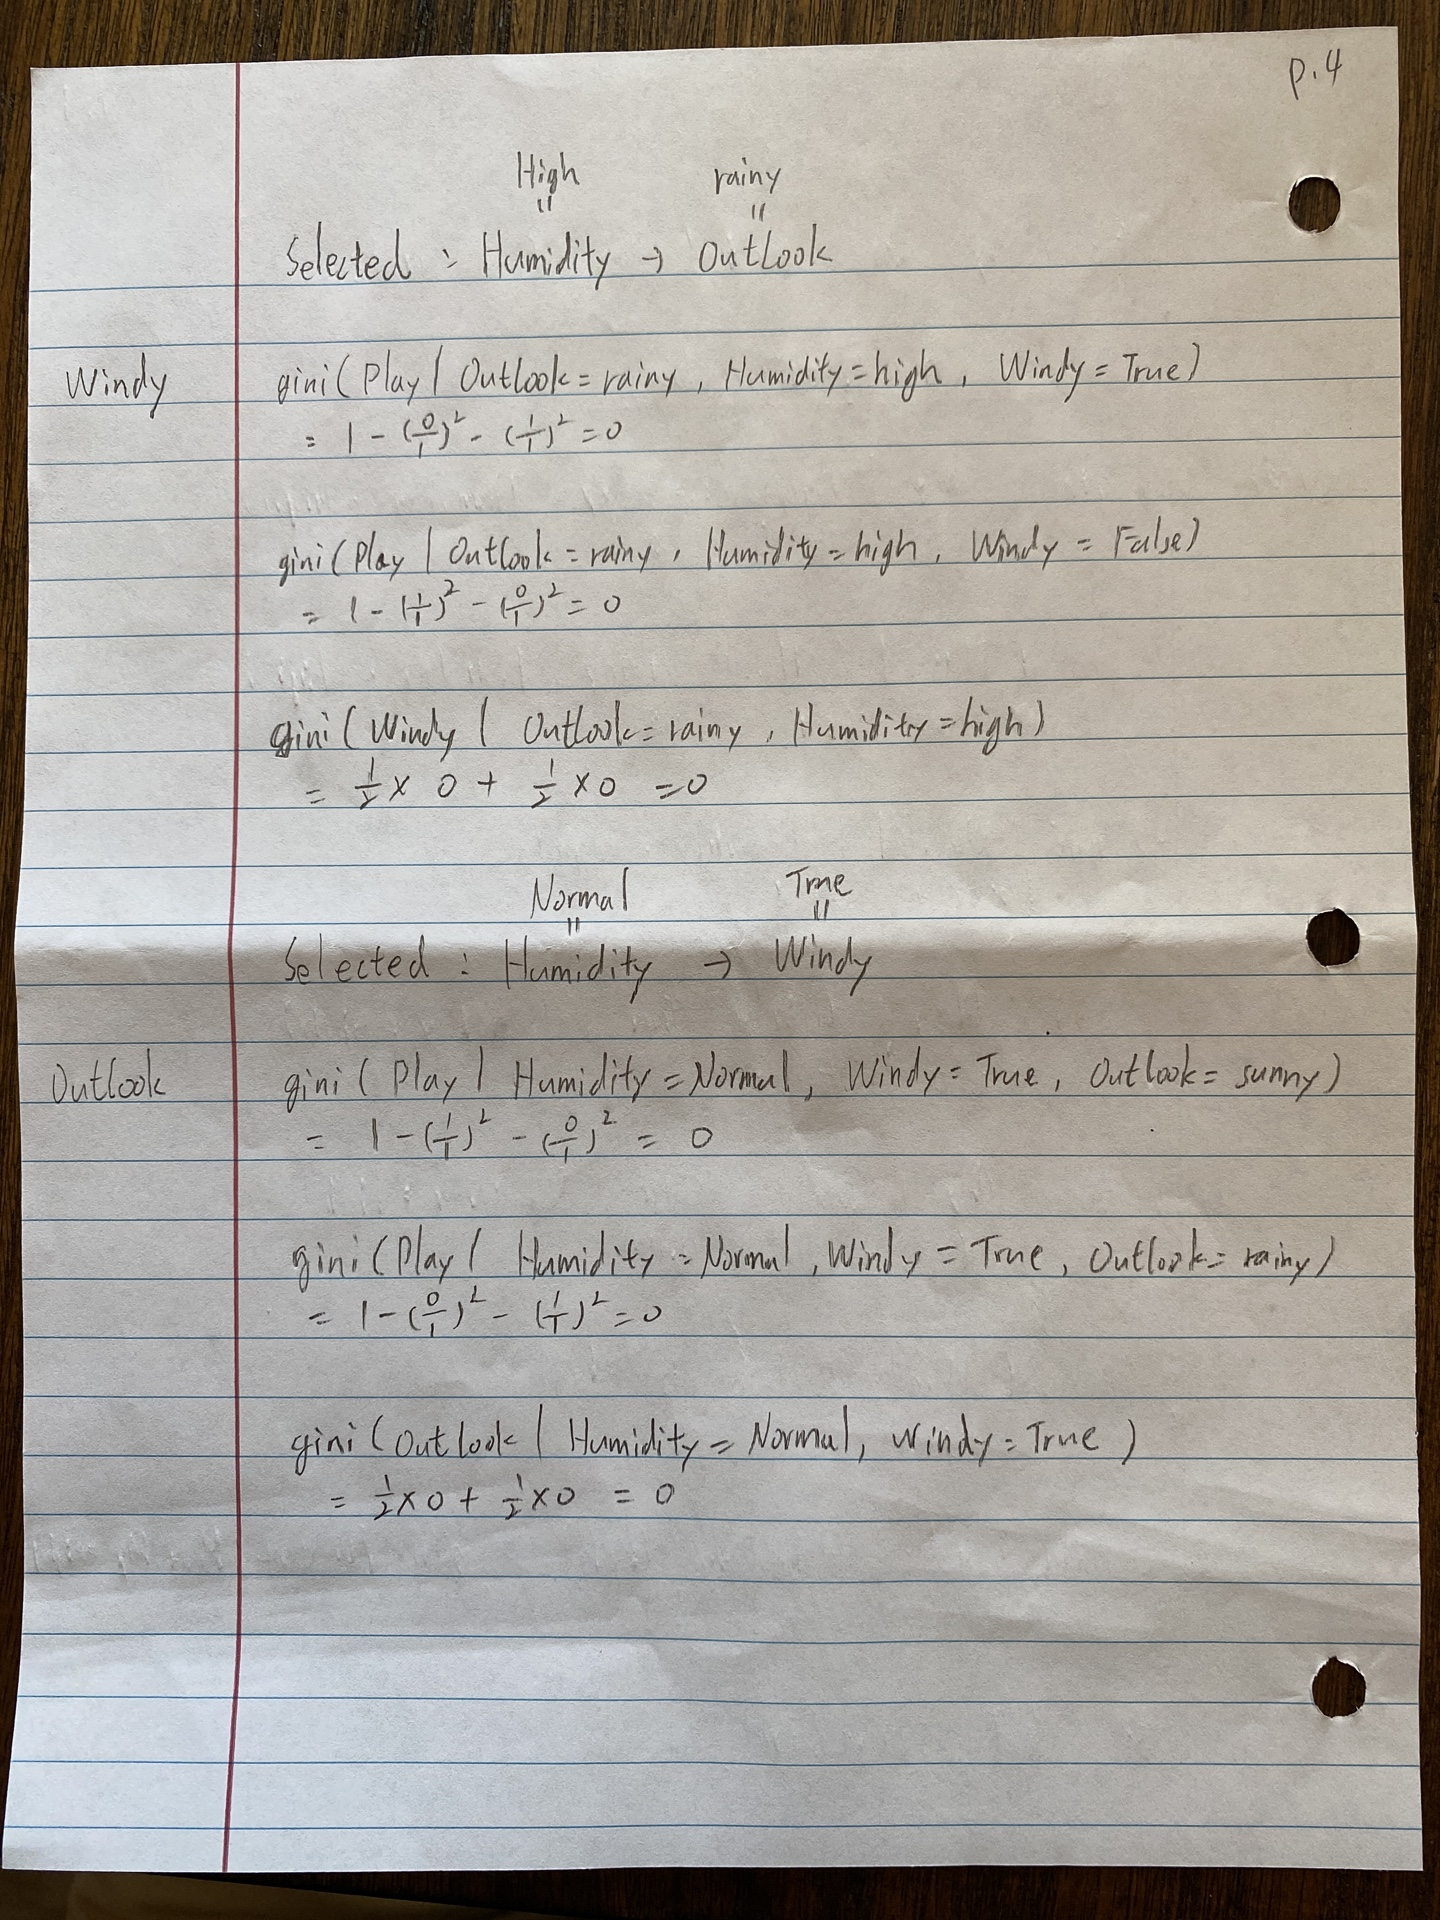

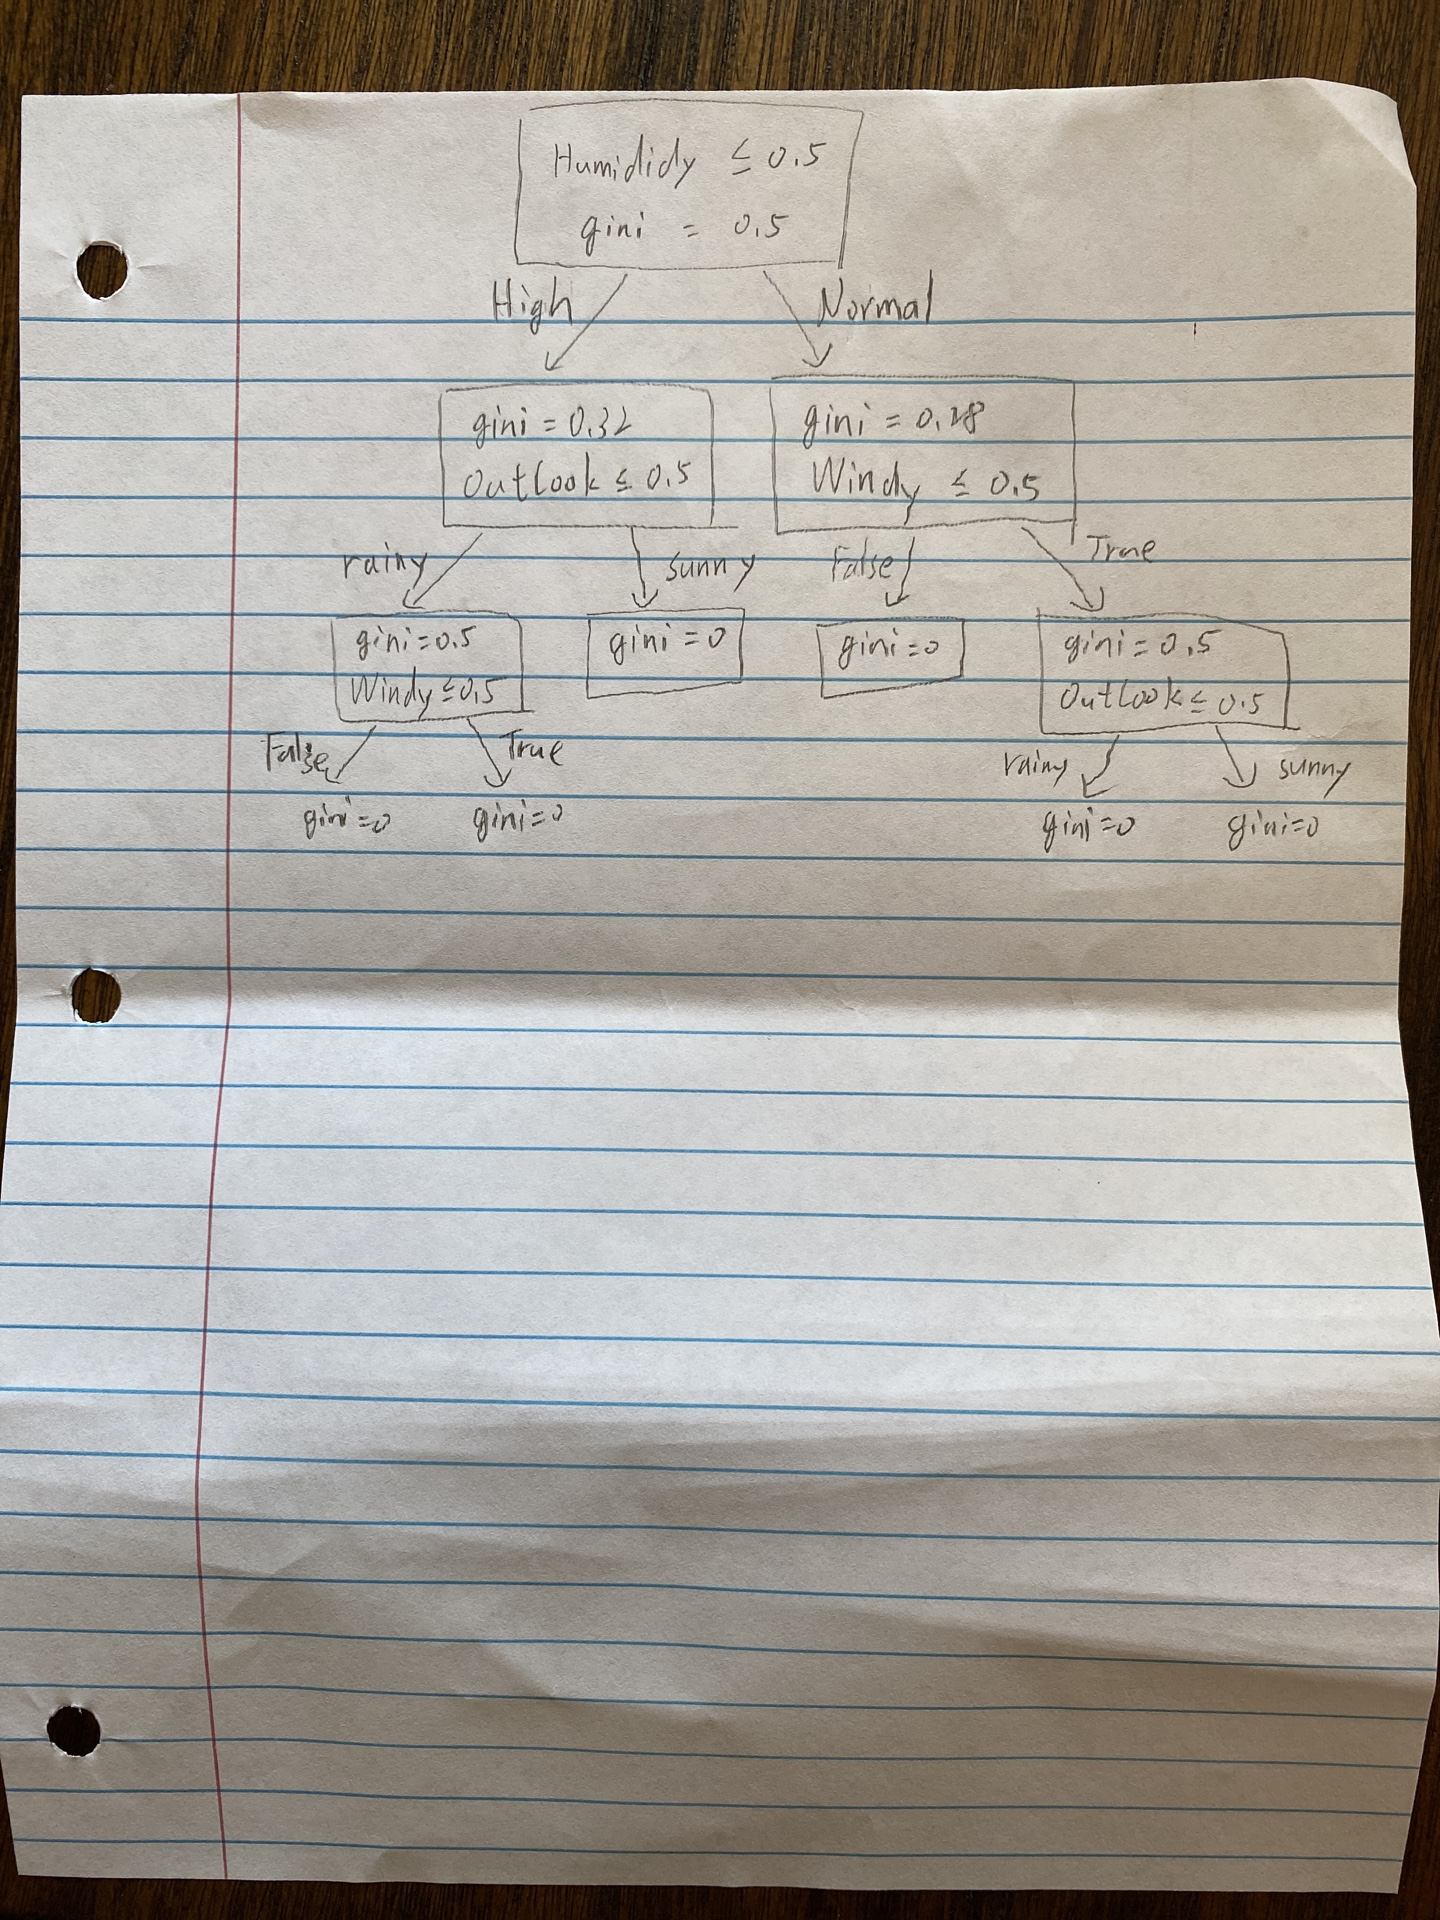

### Step 4: Compare the tree with results from sklearn

#### Convert textual feature values into numeric type

In [50]:
weather_df_numerical = weather_df.copy()
cat_vars = ['Outlook', 'Humidity', 'Windy']

weather_df_numerical['Outlook'] = pd.Categorical(weather_df_numerical['Outlook']).codes
weather_df_numerical['Humidity'] = pd.Categorical(weather_df_numerical['Humidity']).codes
weather_df_numerical['Windy'] = pd.Categorical(weather_df_numerical['Windy']).codes
weather_df_numerical['Play (outcome)'] = pd.Categorical(weather_df_numerical['Play (outcome)']).codes

weather_df_numerical

Outlook  Humidity  Windy  Play (outcome)
0         1         1      0               1
1         0         1      0               1
2         0         0      0               1
3         0         1      0               1
4         1         1      0               1
5         1         0      0               0
6         1         0      0               0
7         0         1      1               0
8         0         0      1               0
9         1         0      1               0
10        1         1      1               1

In [51]:
## check the data type for each column 
weather_df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Outlook         11 non-null     int8 
 1   Humidity        11 non-null     int8 
 2   Windy           11 non-null     int8 
 3   Play (outcome)  11 non-null     int8 
dtypes: int8(4)
memory usage: 172.0 bytes


#### Convert pandas dataframe to numpy array for decision trees

In [52]:
labels = weather_df_numerical['Play (outcome)'].to_numpy()
labels

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int8)

#### Prepare feature data by removing labels, and convert to numpy

In [53]:
features = weather_df_numerical.drop(['Play (outcome)'], axis = 1)
features_np = features.to_numpy()
features_np

array([[1, 1, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 1, 0],
       [1, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 1],
       [0, 0, 1],
       [1, 0, 1],
       [1, 1, 1]], dtype=int8)

#### Loading DecisionTreeClassifier function from sklearn

In [54]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', random_state=42)

In [55]:
tree_clf.fit(features_np, labels)

DecisionTreeClassifier(random_state=42)

In [56]:
from sklearn.tree import export_graphviz
import numpy as np

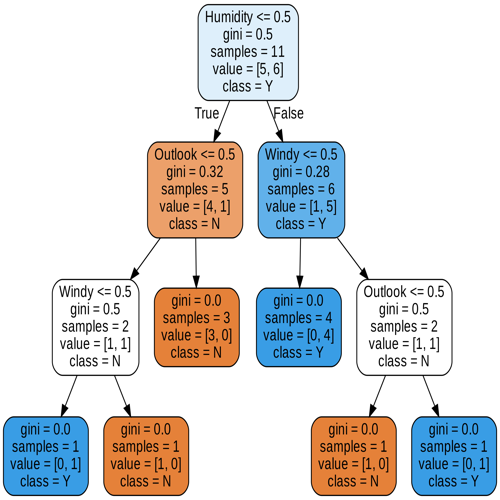

In [57]:
weather_class = np.unique(weather_df[['Play (outcome)']])
export_graphviz(tree_clf, out_file='tree.dot', 
                feature_names = list(features.columns.values),
                class_names = weather_class,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from PIL import Image
im = Image.open(r'tree.png')
newsize = (500, 500) 
im1 = im.resize(newsize) 
# Shows the image in image viewer  
im1

## Calculate the impurity measures (Entropy, Gini index, information gain, misclassification error).

In [58]:
weather2_csv = """Outlook,Play (outcome)
sunny,Y
rainy,Y
rainy,Y
rainy,Y
sunny,Y
sunny,N
sunny,N
rainy,N
rainy,N
sunny,N
sunny,Y"""

In [59]:
weather2_df = pd.DataFrame([x.split(',') for x in weather2_csv.split('\n')[1:]], columns=[x for x in weather2_csv.split('\n')[0].split(',')])
weather2_df

Outlook Play (outcome)
0    sunny              Y
1    rainy              Y
2    rainy              Y
3    rainy              Y
4    sunny              Y
5    sunny              N
6    sunny              N
7    rainy              N
8    rainy              N
9    sunny              N
10   sunny              Y

### 1. Calculate the initial Entropy of the target variable 'Play'?

In [60]:
def entropy(i,j):
  if i == 0 or j == 0:
    return 0
  p = i / (i + j)
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

In [61]:
entropy_target = entropy(6, 5)
entropy_target

0.9940302114769565

### 2. Calculate the initial Gini index of the target variable 'Play'?

In [62]:
gini_target = gini(6,5)
gini_target

0.4958677685950414

### 3. Calculate the initial misclassification error of the target variable 'Play'?

In [63]:
Error = 1 - max(5/11, 6/11)
Error

0.4545454545454546

### 4. Calculate the Entropy of the target variable 'Play' when splitting data by 'Outlook' (H(Play|Outlook))?

In [64]:
# put sunny only data in a new dataframe
weather_df_sunny = weather2_df.where(weather2_df['Outlook']=='sunny').dropna()
weather_df_sunny

Outlook Play (outcome)
0    sunny              Y
4    sunny              Y
5    sunny              N
6    sunny              N
9    sunny              N
10   sunny              Y

In [65]:
# entropy of sunny condition
sunny_entropy = entropy(3,3)
sunny_entropy

1.0

In [66]:
# put rainy only data in a new dataframe
weather_df_rainy = weather_df.where(weather_df['Outlook']=='rainy').dropna()
weather_df_rainy

Outlook Humidity Windy Play (outcome)
1   rainy   normal     F              Y
2   rainy     high     F              Y
3   rainy   normal     F              Y
7   rainy   normal     T              N
8   rainy     high     T              N

In [67]:
# entropy of rainy condition
rainy_entropy = entropy(3,2)
rainy_entropy

0.9709505944546686

H(Play|Outlook)

In [68]:
outlook_entropy = 6 / 11 * sunny_entropy + 5 / 11 * rainy_entropy
outlook_entropy

0.986795724752122

### 5. Calculate the Gini index of the target variable 'Play' when splitting data by 'Outlook' (Gini(Play|Outlook))?


In [69]:
# put sunny only data in a new dataframe
weather_df_sunny = weather_df.where(weather_df['Outlook']=='sunny').dropna()
weather_df_sunny

Outlook Humidity Windy Play (outcome)
0    sunny   normal     F              Y
4    sunny   normal     F              Y
5    sunny     high     F              N
6    sunny     high     F              N
9    sunny     high     T              N
10   sunny   normal     T              Y

In [70]:
# Gini index of sunny condition
sunny_gini = gini(3,3)
sunny_gini

0.5

In [71]:
# put rainy only data in a new dataframe
weather_df_rainy = weather_df.where(weather_df['Outlook']=='rainy').dropna()
weather_df_rainy

Outlook Humidity Windy Play (outcome)
1   rainy   normal     F              Y
2   rainy     high     F              Y
3   rainy   normal     F              Y
7   rainy   normal     T              N
8   rainy     high     T              N

In [72]:
# Gini index of rainy condition
rainy_gini = gini(3,2)
rainy_gini

0.48

### 6. Calculate the misclassification error of the target variable 'Play' when splitting data by 'Outlook' (Classification Error(Play|Outlook))?

In [73]:
Error = 1 - max(3 / 6, 3 / 6)
Error

0.5

In [74]:
Error = 1 - max(3 / 5, 2 / 5)
Error

0.4

### 7. Calculate the Information gain of the target variable 'Play' when splitting data by 'Outlook' (IG(Play|Outlook))?

In [75]:
entropy_target - outlook_entropy

0.00723448672483451

## Question 3. Train a classification Tree. The following questions should be completed in the Jupyter Notebook.

In this exercise, we will use the Car_Evaluation (Links to an external site.) dataset (https://archive.ics.uci.edu/ml/datasets/Car+Evaluation)  to fit a classification tree for car evaluation using functions in the 'sklearn' module.  The dataset contains six input attributes: buying, maint, doors, persons, lug_boot, safety. The target variable contains four classes for car quality: unacc, acc, good, and v-good.

### Step3: Access files on my google drive

In [76]:
from google.colab import drive

In [77]:
drive.mount('/content/drive')

Mounted at /content/drive


In [78]:
%cd /content/drive/'MyDrive'/MSI/US Job/Slu Class/CSCI-4750-01/Data

/content/drive/MyDrive/MSI/US Job/Slu Class/CSCI-4750-01/Data


### Step 4: Data Loading

In [79]:
car_csv = pd.read_csv('car.data', header=None)
car_csv

0      1      2     3      4     5      6
0     vhigh  vhigh      2     2  small   low  unacc
1     vhigh  vhigh      2     2  small   med  unacc
2     vhigh  vhigh      2     2  small  high  unacc
3     vhigh  vhigh      2     2    med   low  unacc
4     vhigh  vhigh      2     2    med   med  unacc
...     ...    ...    ...   ...    ...   ...    ...
1723    low    low  5more  more    med   med   good
1724    low    low  5more  more    med  high  vgood
1725    low    low  5more  more    big   low  unacc
1726    low    low  5more  more    big   med   good
1727    low    low  5more  more    big  high  vgood

[1728 rows x 7 columns]

convert the textual data into categorical numbers

In [80]:
for i in range(len(car_csv.columns)):
  print(car_csv[i].unique())
  print(pd.Categorical(car_csv[i]).codes)
  car_csv[i] = pd.Categorical(car_csv[i]).codes


['vhigh' 'high' 'med' 'low']
[3 3 3 ... 1 1 1]
['vhigh' 'high' 'med' 'low']
[3 3 3 ... 1 1 1]
['2' '3' '4' '5more']
[0 0 0 ... 3 3 3]
['2' '4' 'more']
[0 0 0 ... 2 2 2]
['small' 'med' 'big']
[2 2 2 ... 0 0 0]
['low' 'med' 'high']
[1 2 0 ... 1 2 0]
['unacc' 'acc' 'vgood' 'good']
[2 2 2 ... 2 1 3]


In [81]:
car_csv

0  1  2  3  4  5  6
0     3  3  0  0  2  1  2
1     3  3  0  0  2  2  2
2     3  3  0  0  2  0  2
3     3  3  0  0  1  1  2
4     3  3  0  0  1  2  2
...  .. .. .. .. .. .. ..
1723  1  1  3  2  1  2  1
1724  1  1  3  2  1  0  3
1725  1  1  3  2  0  1  2
1726  1  1  3  2  0  2  1
1727  1  1  3  2  0  0  3

[1728 rows x 7 columns]

### Step5: Data Visualization

In [82]:
import matplotlib.pyplot as plt

In [83]:
for i in range(len(car_csv.columns)):
  print(car_csv[i].value_counts())

3    432
0    432
2    432
1    432
Name: 0, dtype: int64
3    432
0    432
2    432
1    432
Name: 1, dtype: int64
0    432
1    432
2    432
3    432
Name: 2, dtype: int64
0    576
1    576
2    576
Name: 3, dtype: int64
2    576
1    576
0    576
Name: 4, dtype: int64
1    576
2    576
0    576
Name: 5, dtype: int64
2    1210
0     384
1      69
3      65
Name: 6, dtype: int64


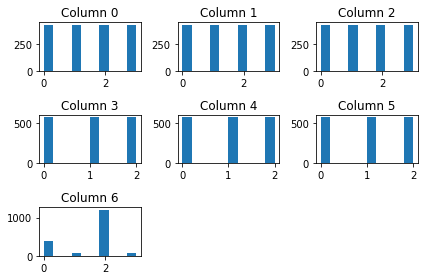

In [84]:
plt.subplot(3,3,1)
plt.hist(car_csv[0])
plt.title("Column 0")
plt.subplot(3,3,2)
plt.hist(car_csv[1])
plt.title("Column 1")
plt.subplot(3,3,3)
plt.hist(car_csv[2])
plt.title("Column 2")
plt.subplot(3,3,4)
plt.hist(car_csv[3])
plt.title("Column 3")
plt.subplot(3,3,5)
plt.hist(car_csv[4])
plt.title("Column 4")
plt.subplot(3,3,6)
plt.hist(car_csv[5])
plt.title("Column 5")
plt.subplot(3,3,7)
plt.hist(car_csv[6])
plt.title("Column 6")

plt.tight_layout()

### Step6: Train/test split

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X = car_csv.drop(6, axis=1)
X

0  1  2  3  4  5
0     3  3  0  0  2  1
1     3  3  0  0  2  2
2     3  3  0  0  2  0
3     3  3  0  0  1  1
4     3  3  0  0  1  2
...  .. .. .. .. .. ..
1723  1  1  3  2  1  2
1724  1  1  3  2  1  0
1725  1  1  3  2  0  1
1726  1  1  3  2  0  2
1727  1  1  3  2  0  0

[1728 rows x 6 columns]

In [87]:
Y = car_csv[6]
Y

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: 6, Length: 1728, dtype: int8

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### Step7: Train a classification tree model

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier()

### Step8: Make the prediction using the classification tree model.

In [91]:
car_train = tree_clf.predict(x_train)
np.unique(car_train, return_counts=True)

(array([0, 1, 2, 3], dtype=int8), array([255,  49, 813,  40]))

In [92]:
car_test = tree_clf.predict(x_test)
np.unique(car_test, return_counts=True)

(array([0, 1, 2, 3], dtype=int8), array([123,  29, 397,  22]))

In [93]:
tree_clf.predict_proba(x_train)

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [94]:
tree_clf.predict_proba(x_test)

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

### Step9: Evaluate a classification tree model.

In [95]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [96]:
accuracy_score(y_train, car_train)

1.0

In [97]:
accuracy_score(y_test, car_test)

0.9719789842381786

In [98]:
confusion_matrix(y_train, car_train)

array([[255,   0,   0,   0],
       [  0,  49,   0,   0],
       [  0,   0, 813,   0],
       [  0,   0,   0,  40]])

In [99]:
confusion_matrix(y_test, car_test)

array([[118,   9,   2,   0],
       [  0,  20,   0,   0],
       [  2,   0, 395,   0],
       [  3,   0,   0,  22]])

In [100]:
precision_score(y_train, car_train, pos_label=1, average='micro')

1.0

In [101]:
precision_score(y_test, car_test, pos_label=1, average='micro')

0.9719789842381786

In [102]:
recall_score(y_train, car_train, pos_label=1, average='micro')

1.0

In [103]:
recall_score(y_test, car_test, pos_label=1, average='micro')

0.9719789842381786

In [104]:
f1_score(y_train, car_train, pos_label=1, average='micro')

1.0

In [105]:
f1_score(y_test, car_test, pos_label=1, average='micro')

0.9719789842381786

In [106]:
print(classification_report(y_train,car_train, target_names=['acceptable','good','very good','unacceptable']))

              precision    recall  f1-score   support

  acceptable       1.00      1.00      1.00       255
        good       1.00      1.00      1.00        49
   very good       1.00      1.00      1.00       813
unacceptable       1.00      1.00      1.00        40

    accuracy                           1.00      1157
   macro avg       1.00      1.00      1.00      1157
weighted avg       1.00      1.00      1.00      1157



### Step10: Compare models with a different splitting criterion.

In [107]:
car_train_new, car_validation, y_train_new, y_test_validation = train_test_split(X, Y, test_size=0.2, random_state=42)

In [108]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, max_features=5)
tree_clf.fit(car_train_new, y_train_new)

DecisionTreeClassifier(max_depth=4, max_features=5)

In [109]:
tree_clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=5)
tree_clf2.fit(car_train_new, y_train_new)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=5)

In [110]:
car_test_gini = tree_clf.predict(car_validation)

In [111]:
car_test_entropy = tree_clf2.predict(car_validation)

In [112]:
accuracy_score(y_test_validation, car_test_gini)

0.8208092485549133

In [113]:
accuracy_score(y_test_validation, car_test_entropy)

0.8236994219653179

They got almost same score